Abhängigkeiten installieren und Packages laden

In [ ]:
!pip install pandas
!pip install numpy

import pandas as pd
import numpy as np

# wenn es nicht läuft runtime neu starten

Subsets zusammenführen, Dopplungen entfernen

In [ ]:
csv_data_raw = [r'/content/4_1_ergebnisse.csv', r'/content/4_2_ergebnisse.csv', r'/content/4_3_ergebnisse.csv', r'/content/4_4_ergebnisse.csv']

csv_pfad = '/content/05_csv_data_raw.csv' # nicht wundern, hatte datei zwischenzeitlich umbenannt

csv_no_doubles_pfad = '/content/06_data_raw_no_doubles.csv'

df = pd.concat((pd.read_csv(f) for f in csv_data_raw), ignore_index=True)

df.to_csv('csv_data_raw.csv', index=False)

def entferne_doppelte_rezensionen(csv_pfad, anzahl_rezensionen=5):
    df = pd.read_csv(csv_pfad)

    # Doppelte Rezensionen basierend auf place_id und rezension entfernen
    df = df.drop_duplicates(subset=['place_id', 'rezension'], keep='first')

    # Anzahl der Rezensionen pro Ort begrenzen
    df = df.groupby('place_id').head(anzahl_rezensionen).reset_index(drop=True)

    return df

# Funktionsaufruf
ergebnis_df = entferne_doppelte_rezensionen(csv_pfad)

# Das bereinigte DataFrame anzeigen (optional)
print(ergebnis_df)

# Das bereinigte DataFrame in eine neue CSV-Datei speichern (optional)
ergebnis_df.to_csv("06_data_raw_no_doubles.csv", index=False)

\#2 (Freitag, 28/03) - erweitertes Datenset, doubles entfernen

In [ ]:
csv_pfad = '/content/09_data_covariates_avg.csv' # nicht wundern, hatte datei zwischenzeitlich umbenannt

csv_no_doubles_pfad = '/content/10_data_covs_avg_no_doubles.csv'

def entferne_doppelte_rezensionen(csv_pfad, anzahl_rezensionen=5):
    df = pd.read_csv(csv_pfad)

    # Doppelte Rezensionen basierend auf place_id und rezension entfernen
    df = df.drop_duplicates(subset=['place_id', 'rezension'], keep='first')

    # Anzahl der Rezensionen pro Ort begrenzen
    df = df.groupby('place_id').head(anzahl_rezensionen).reset_index(drop=True)

    return df

# Funktionsaufruf
ergebnis_df = entferne_doppelte_rezensionen(csv_pfad)

# Das bereinigte DataFrame anzeigen (optional)
print(ergebnis_df)

# Das bereinigte DataFrame in eine neue CSV-Datei speichern (optional)
ergebnis_df.to_csv("10_data_covs_avg_no_doubles.csv", index=False)

                                                     ort  \
0      DIAKO Krankenhaus gGmbH, Knuthstraße 1, Flensburg   
1      DIAKO Krankenhaus gGmbH, Knuthstraße 1, Flensburg   
2      DIAKO Krankenhaus gGmbH, Knuthstraße 1, Flensburg   
3      DIAKO Krankenhaus gGmbH, Knuthstraße 1, Flensburg   
4      DIAKO Krankenhaus gGmbH, Knuthstraße 1, Flensburg   
...                                                  ...   
11777  Klinikum Altenburger Land GmbH, Am Waldessaum ...   
11778  Klinikum Altenburger Land GmbH, Am Waldessaum ...   
11779  Klinikum Altenburger Land GmbH, Am Waldessaum ...   
11780  Klinikum Altenburger Land GmbH, Am Waldessaum ...   
11781  Klinikum Altenburger Land GmbH, Am Waldessaum ...   

                               name_x        strasze hausnr      stadt  \
0             DIAKO Krankenhaus gGmbH    Knuthstraße      1  Flensburg   
1             DIAKO Krankenhaus gGmbH    Knuthstraße      1  Flensburg   
2             DIAKO Krankenhaus gGmbH    Knuthstraße     

Rezensionen durchschnittliche Länge

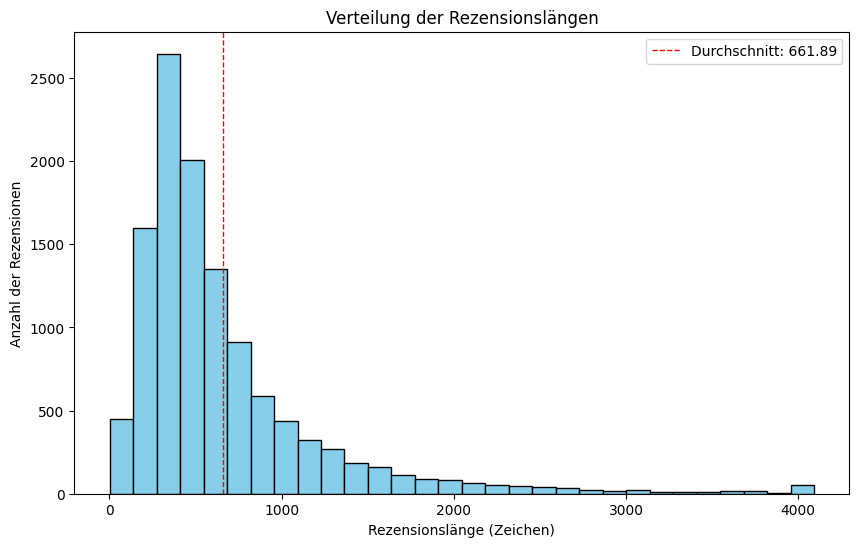

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV-Datei einlesen
df = pd.read_csv("10_data_covs_avg_no_doubles.csv")

# Berechne die Länge jeder Rezension
df['rezension_laenge'] = df['rezension'].str.len()

# Berechne die durchschnittliche Rezensionslänge
durchschnittliche_laenge = df['rezension_laenge'].mean()
print(f"Die durchschnittliche Rezensionslänge beträgt: {durchschnittliche_laenge:.2f} Zeichen")

# Visualisierung (Histogramm der Rezensionslängen)
plt.figure(figsize=(10, 6))
plt.hist(df['rezension_laenge'], bins=30, color='skyblue', edgecolor='black')
plt.title('Verteilung der Rezensionslängen')
plt.xlabel('Rezensionslänge (Zeichen)')
plt.ylabel('Anzahl der Rezensionen')
plt.axvline(durchschnittliche_laenge, color='red', linestyle='dashed', linewidth=1, label=f'Durchschnitt: {durchschnittliche_laenge:.2f}')
plt.legend()
plt.show()

Validierung der automatischen Abrufe: Zufallsstichprobe & manueller Abgleich

In [ ]:
df = pd.read_csv(csv_no_doubles_pfad) #siehe oben

def zufallsstichprobe(csv_pfad, stichprobengroesse=100, zufalls_seed=42): #seed 42
    df = pd.read_csv(csv_no_doubles_pfad)

    # Zufallsstichprobe ziehen
    stichprobe_df = df.sample(n=min(stichprobengroesse, len(df)), random_state=zufalls_seed)

    return stichprobe_df

# Beispielaufruf:
csv_datei = csv_no_doubles_pfad # Ersetzen Sie dies durch den tatsächlichen Dateinamen
stichprobe = zufallsstichprobe(csv_datei, stichprobengroesse=100, zufalls_seed=42)

# Die Stichprobe in eine neue CSV-Datei speichern (optional):
stichprobe.to_csv("07_stichprobe_validierung.csv", index=False)

# Validierung manuell durchgeführt, für Kriterien siehe Hausarbeit;
# Kodierung: 1 = valid; 0 = not valid or valid with restrictions;


########## hier noch die Ergebnisse ausrechnen ###############

                                                     ort  \
2507   Alexius/Josef Krankenhaus, Montanusstraße 54, ...   
11482  Sophien- und Hufeland-Klinikum gGmbH, Henry-va...   
4207   Ev. Krankenhaus Lippstadt, Wiedenbrücker Straß...   
1935   Rotes-Kreuz-Krankenhaus Bremen gGmbH, St.-Paul...   
7768   Klinik Dr. Wilhelm, Hans-Urmiller-Ring 46, Wol...   
...                                                  ...   
10769  Hauptstandort Rudolf-Virchow-Klinikum, Virchow...   
10563  Sana HANSE-Klinikum Wismar GmbH, Dr.-Unruh-Str...   
8830   Bezirksklinikum Ansbach, Paracelsusstraße 36, ...   
5006   Helios Kliniken Kassel, Hansteinstraße 29, Kassel   
4216       LWL-Klinik Lippstadt, Im Hofholz 6, Lippstadt   

                                        name                    strasze  \
2507               Alexius/Josef Krankenhaus             Montanusstraße   
11482   Sophien- und Hufeland-Klinikum gGmbH  Henry-van-de-Velde-Straße   
4207               Ev. Krankenhaus Lippstadt       Wie

Neues File mit weiteren Covariaten aus dem KHV

In [ ]:
# Lade die Krankenhausdaten aus der Excel-Datei
khv_df = pd.read_excel('/content/2023_khv.xlsx', sheet_name='Tabelle1')

# Lade die Google-Maps-Rezensionen aus der CSV-Datei
reviews_df = pd.read_csv('/content/06_data_raw_no_doubles.csv')

# Bereinige die Spaltennamen in beiden DataFrames
khv_df.columns = khv_df.columns.str.strip()
reviews_df.columns = reviews_df.columns.str.strip()

#print(khv_df.head())
#print(reviews_df.head())
#
#name = str('Adresse_Name')
#strasze = str('Adresse_Strasse_Standort')
#hausnr = str('Adresse_Haus-Nr._Standort')
#stadt = str('Adresse_Ort_Standort')
#ort = f"{name}, {strasze} {hausnr}, {stadt}"

# Führe die Daten basierend auf dem exakten Krankenhausnamen zusammen
merged_df = pd.merge(reviews_df, khv_df, left_on='name', right_on='Adresse_Name', how='left')

# Wähle die relevanten Spalten aus, die wir behalten möchten
columns_to_keep = [
    'ort', 'name', 'strasze', 'hausnr', 'stadt', 'bundesland', 'place_id', 'bewertung', 'rezension', 'zeit',
    'Traeger', 'T_Name', 'EinrichtungsTyp', 'Allgemeine_Notfallversorgung',
    'Spezielle_Notfallversorgung_Schwerverletzte', 'Spezielle_Notfallversorgung_Kinder',
    'Spezielle_Notfallversorgung_Spezial', 'Spezielle_Notfallversorgung_Schlaganfall',
    'Spezielle_Notfallversorgung_Durchblutung_Herz', 'INSG'
]

# Erstelle das finale DataFrame mit den ausgewählten Spalten
final_df = merged_df[columns_to_keep]

# Speichere das finale DataFrame in eine neue CSV-Datei
final_df.to_csv('08_data_and_covariates.csv', index=False, encoding='utf-8-sig')

print("Die Daten wurden erfolgreich zusammengeführt und in 'merged_krankenhaus_reviews.csv' gespeichert.")

Die Daten wurden erfolgreich zusammengeführt und in 'merged_krankenhaus_reviews.csv' gespeichert.


initialize BERTopic

In [ ]:
!pip install pandas numpy bertopic umap-learn scipy scikit-learn numba tqdm pynndescent matplotlib datashader holoviews
from bertopic import BERTopic
import umap
import pandas as pd
import numpy as np

rezensionen_data = pd.read_csv("/content/06_data_raw_no_doubles.csv", header = None)

rezensionen_data['ort'] = rezensionen_data[0]
rezensionen_data['bundesland'] = rezensionen_data[5]
rezensionen_data['place_id'] = rezensionen_data[6]
rezensionen_data['bewertung'] = rezensionen_data[7]
rezensionen_data['rezension'] = rezensionen_data[8]
rezensionen_data['zeit'] = rezensionen_data[9]

rezensionen_data['bundesland'].value_counts()
rezensionen_data['zeit'].value_counts()
rezensionen_data['bewertung'].value_counts()

print(rezensionen_data.iloc[0:3, 3:6]) # Note that Python starts with 0 and excludes last element

        3          4           5
0  hausnr      stadt  bundesland
1       1  Flensburg         1.0
2       1  Flensburg         1.0


In [ ]:
!pip show umap-learn
import umap
print(dir(umap))

Name: umap-learn
Version: 0.5.7
Summary: Uniform Manifold Approximation and Projection
Home-page: http://github.com/lmcinnes/umap
Author: 
Author-email: 
License: BSD
Location: /usr/local/lib/python3.11/dist-packages
Requires: numba, numpy, pynndescent, scikit-learn, scipy, tqdm
Required-by: bertopic
['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__']


In [ ]:
try:
    from umap.umap_ import UMAP
    print("Successfully imported UMAP from umap.umap_")
except ImportError as e:
    print(f"ImportError: {e}")
    print("Could not import UMAP from umap.umap_")

Successfully imported UMAP from umap.umap_


In [ ]:
print(rezensionen_data.iloc[0:5, 8]) # Zeigt die ersten 5 Rezensionen an (Spalte 8)

0                                            rezension
1    Von A-Z positiv. Teil 1\nVom Reinigungspersona...
2    Ich kann die vielen schlechten Rezensionen übe...
3    Ich bin total begeistert von dem Personal  auf...
4    Enttäuschende Erfahrung in der Notaufnahme\n\n...
Name: 8, dtype: object


run BERT

In [ ]:
!pip show umap-learn

Name: umap-learn
Version: 0.5.7
Summary: Uniform Manifold Approximation and Projection
Home-page: http://github.com/lmcinnes/umap
Author: 
Author-email: 
License: BSD
Location: /usr/local/lib/python3.11/dist-packages
Requires: numba, numpy, pynndescent, scikit-learn, scipy, tqdm
Required-by: bertopic


In [ ]:
umap_model = UMAP(random_state=4242)

topic_model = BERTopic(umap_model=umap_model, language="german", nr_topics="auto") # Sprache explizit auf Deutsch
rezensionen_data['rezension'] = rezensionen_data['rezension'].astype(str)
topics, probs = topic_model.fit_transform(rezensionen_data['rezension'])

topic_model.get_topic_info() # topics; -1 = garbage topic

topic_model.get_document_info(rezensionen_data['rezension']) # Klassifizierung der einzelnen Rezensionen

,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Probability,Representative_document
0,rezension,0,0_und_ich_die_der,"[und, ich, die, der, das, in, sehr, nicht, war...",[Mein Arzt hatte mir eine Überweisung und Einw...,und - ich - die - der - das - in - sehr - nich...,1.0,False
1,Von A-Z positiv. Teil 1\nVom Reinigungspersona...,0,0_und_ich_die_der,"[und, ich, die, der, das, in, sehr, nicht, war...",[Mein Arzt hatte mir eine Überweisung und Einw...,und - ich - die - der - das - in - sehr - nich...,1.0,False
2,Ich kann die vielen schlechten Rezensionen übe...,0,0_und_ich_die_der,"[und, ich, die, der, das, in, sehr, nicht, war...",[Mein Arzt hatte mir eine Überweisung und Einw...,und - ich - die - der - das - in - sehr - nich...,1.0,False
3,Ich bin total begeistert von dem Personal auf...,0,0_und_ich_die_der,"[und, ich, die, der, das, in, sehr, nicht, war...",[Mein Arzt hatte mir eine Überweisung und Einw...,und - ich - die - der - das - in - sehr - nich...,1.0,False
4,Enttäuschende Erfahrung in der Notaufnahme\n\n...,0,0_und_ich_die_der,"[und, ich, die, der, das, in, sehr, nicht, war...",[Mein Arzt hatte mir eine Überweisung und Einw...,und - ich - die - der - das - in - sehr - nich...,1.0,False
...,...,...,...,...,...,...,...,...
11778,Meine 81 Jährige Mutter wurde auf Station 24 b...,0,0_und_ich_die_der,"[und, ich, die, der, das, in, sehr, nicht, war...",[Mein Arzt hatte mir eine Überweisung und Einw...,und - ich - die - der - das - in - sehr - nich...,1.0,False
11779,Absolut zufrieden mit dem Service und vorallem...,0,0_und_ich_die_der,"[und, ich, die, der, das, in, sehr, nicht, war...",[Mein Arzt hatte mir eine Überweisung und Einw...,und - ich - die - der - das - in - sehr - nich...,1.0,False
11780,Ich kann jetzt nur für Kreißsaal sowie Station...,0,0_und_ich_die_der,"[und, ich, die, der, das, in, sehr, nicht, war...",[Mein Arzt hatte mir eine Überweisung und Einw...,und - ich - die - der - das - in - sehr - nich...,1.0,False
11781,Durch das schnelle und kompetente Handeln alle...,0,0_und_ich_die_der,"[und, ich, die, der, das, in, sehr, nicht, war...",[Mein Arzt hatte mir eine Überweisung und Einw...,und - ich - die - der - das - in - sehr - nich...,1.0,False


Textsample

In [ ]:
sample_size = 0.1  # z.B. 10% der Daten für das Sample
rezensionen_sample = rezensionen_data.sample(frac=sample_size, random_state=42) # random_state für Reproduzierbarkeit

# Verwende jetzt rezensionen_sample statt rezensionen_data für BERTopic:
topics_sample, probs_sample = topic_model.fit_transform(rezensionen_sample['rezension'])

topic_model.get_document_info(rezensionen_sample['rezension']) # Document Info für das Sample
topic_model.get_topic_info() # Topic Info für das Sample

visualize BERT

In [ ]:
# topic distance
topic_model.visualize_topics() # topics are closer together if they exhibit similar word distributions or co-occurring patterns, even if they do not share identical words


ModuleNotFoundError: UMAP is required to reduce the embeddings.. Please install it using `pip install umap-learn`.

In [ ]:
# word scores
topic_model.visualize_barchart()

# Plot for topics 40 to 51
topic_model.visualize_barchart(topics=list(range(40, 52)))

In [ ]:
# Topic similarity
topic_model.visualize_heatmap()

In [ ]:
# Topic hierarchy
topic_model.visualize_hierarchy()

deepdive into topics

In [ ]:
topic_model.get_topic(49) # Wörter anzeigen lassen

topic_model.get_representative_docs(topic=82) # Repräsentative Artikel anzeigen lassen

topic_model.set_topic_labels({49: "Iraq attacks", 82: "India attacks"}) # manuelles labeling
topic_model.get_topic_info(49) # default label = XX_top_three_words
topic_model.get_topic_info(82)

Topics je nach Covariate

In [ ]:
sterne = rezensionen_data['bewertung']

topics_x_sterne = topic_model.topics_per_class(rezensionen_data['description'], classes = sterne)

topic_model.visualize_topics_x_sterne(topics_x_sterne, top_n_topics = 31)

Advanced ...

TESTUMGEBUNG

In [ ]:
import pandas as pd
from bertopic import BERTopic

# Read the CSV file
df = pd.read_csv("07_stichprobe_validierung.csv")

# Extract the 'rezension' column
docs = df['rezension'].tolist()

# Initialize BERTopic model
topic_model = BERTopic(language="german")

# Run BERTopic model
topics, probs = topic_model.fit_transform(docs)

# Get topic information (optional)
topic_info = topic_model.get_topic_info()

# Print topic information (optional)
print(topic_info)

# Example: Get the most frequent topics
print("\nMost frequent topics:")
print(topic_info.head())